# Week 41 exercises Part 1

Group: Eyyüb Güven, Alicja Terelak, Giorgio
Chirio

our own inversion:
[[2.]
 [4.]
 [5.]]
theta from our own grad descent:
[[2.01654563]
 [3.95581353]
 [5.02061267]]
Theta using momentum GD:
[[1.99713239]
 [4.0076582 ]
 [4.99642751]]
Theta from stochastic GD:
[[2.01857056]
 [3.9509852 ]
 [5.02298496]]
Theta from momentum stochastic Gd:
[[1.98984543]
 [4.02630022]
 [4.98782498]]


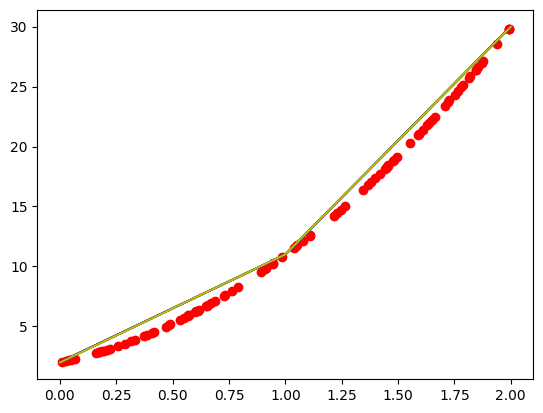

In [58]:
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n=100
x = 2*np.random.rand(n,1)
y = 2+(4*x)+(5*(x**2))


X = np.c_[np.ones((n,1)),x, x**2]

X_TX = X.T @ X

linreg_theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("our own inversion:")
print(linreg_theta)



H = (2/n) * X_TX
EigVal, EigVect = np.linalg.eig(H)

theta = np.random.randn(3,1)
eta = 1.0/np.max(EigVal)
Niterations = 1000

# Base Gradient Descent
for interation in range(Niterations):
    grads = 2.0/n * X.T @ ((X @ theta)-y)
    theta -= eta*grads

print("theta from our own grad descent:")
print(theta)


xnew = np.array([[0],[1],[2]])
Xnew = np.c_[np.ones((3,1)), xnew, xnew**2]


ynew = Xnew.dot(theta)

# Gradient Descent with Momentum

momentum = 0.3
theta = np.random.randn(3,1)

change = 0.0
for iteration in range(Niterations):
    grads = 2.0/n * X.T @ ((X @ theta)-y)
    change = eta * grads + momentum * change
    theta -= change
print("Theta using momentum GD:")
print(theta)

ynew2 = Xnew.dot(theta)

# Normal Stochastic Gradient Descent

theta = np.random.randn(3,1)
epochs = 100
minibatch_size = 5
minibatch_num = int(n/minibatch_size)
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

for epoch in range(epochs):
    for batch_n in range(minibatch_num):
        randInd = minibatch_size*np.random.randint(minibatch_num)
        xi = X[randInd:randInd+minibatch_size]
        yi = y[randInd:randInd+minibatch_size]
        grads = 2.0/minibatch_size * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*minibatch_size+batch_n)
        theta -= eta*grads

print("Theta from stochastic GD:")
print(theta)

ynew3 = Xnew.dot(theta)

# Momentum Stochastic GD

theta = np.random.randn(3,1)
momentum = 0.3
change = 0.0

for epoch in range(epochs):
    for batch_n in range(minibatch_num):
        randInd = minibatch_size*np.random.randint(minibatch_num)
        xi = X[randInd:randInd+minibatch_size]
        yi = y[randInd:randInd+minibatch_size]
        grads = 2.0/minibatch_size * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*minibatch_size+batch_n)
        change = eta*grads + momentum * change
        theta -= change

print("Theta from momentum stochastic Gd:")
print(theta)
ynew4 = Xnew.dot(theta)


plt.plot(x,y, "ro")
plt.plot(xnew, ynew, "r-")
plt.plot(xnew, ynew2, "g-")
plt.plot(xnew, ynew3, "b-")
plt.plot(xnew, ynew4, "y-")
plt.show()

The stockastic gradient descend varies in precision depending on the size of the batches and the number of epochs. If the size of the batches is too big the algorithm will be slower and may be less accurate, since in the batch there could be two minimum points. If the number of ecpochs is too big you incurr in the risk that you may be wasting time, because you could have already found your gradients when you still have epochs left.

In all GD methods if the step size is too big you incur in the risk of overstepping the minimum gradient, and the same thing could happen if your momentum is too big while a using based momentum GD